#Introduction to Data Science
## Dealing with data
***

### The command line
From the command line, terminal, or shell you can perform almost any computer operation that you would normally use a mouse and graphical interface (GUI) for. In some cases, such as dealing with raw data files, the command line can give a quick way to start exploring.

![Terminal](images/terminal.png)

#### File system
To navigate the folder structure of the machine you are on you will typically use commands such as `ls` (list) and `cd` (change directory). You can make a directory with `mkdir` or move (`mv`) and copy (`cp`) files. To delete a file you can `rm` (remove) it. To print the contents of a file you can `cat` (concatenate) it to the screen.

Many commands have options you can set when running them. For example to get a listing of files as a vertical list you can pass the `-l` (list) flag, e.g. `ls -l`. During the normal course of using the command line, you will learn the most useful flags. If you want to see all possible options you can always read the `man` (manual) page for a command, e.g. `man ls`. When you are done reading the `man` page, you can exit by hitting `q` to quit.

You can use shell commands in IPython notebooks by prefixing the line with an exclamation point.

In [ ]:
!ls

In [ ]:
!mkdir test

In [ ]:
!ls -l

In [ ]:
!ls -l images/

In [ ]:
!cp images/terminal.png test/some_picture.png

In [ ]:
!ls test/

In [ ]:
!rm test/ # you can't delete a folder using `rm`!

In [ ]:
# WARNING THIS WILL NOT CONFIRM!
!rm -rf test/

In [ ]:
!ls -l

#### Data manipulation and exploration
Virtually anything you want to do with a data file can be done at the command line. There are dozens of commands that can be used together to get almost any result! Lets take a look at the the file `data/users.csv`.

Before we do anything, lets take a look at the first few lines of the file to get an idea of what's in it.

In [ ]:
!head data/users.csv

Maybe we want to see a few more lines of the file,

In [ ]:
!head -15 data/users.csv

How about the last few lines of the file?

In [ ]:
!tail data/users.csv

We can count how many lines are in the file by using `wc` (a word counting tool) with the `-l` flag to count lines,

In [ ]:
!wc -l data/users.csv

It looks like there are three columns in this file, lets take a look at the first one alone. Here, we can `cut` the field (`-f`) we want as long as we give the proper delimeter (`-d` defaults to tab).

In [ ]:
!cut -f1 -d',' data/users.csv

That's a lot of output. Let's combine the `cut` command with the `head` command by _piping_ the output of one command into another one,

In [ ]:
!cut -f1 -d',' data/users.csv | head

We can use pipes (`|`) to string together many commands to create very powerful one liners. For example, lets get the number of unique users in the first column. We will get all values from the first column, sort them, find all unique values, and then count the number of lines,

In [ ]:
!cut -f1 -d',' data/users.csv | sort | uniq | wc -l

Or, we can get a list of the top-10 most frequently occuring users. If we give `uniq` the `-c` flag, it will return the number of times each value occurs. Since these counts are the first entry in each new line, we can tell `sort` to expect numbers (`-n`) and to give us the results in reverse (`-r`) order. Note, that when you want to use two or more single letter flags, you can just place them one after another.

In [ ]:
!cut -f1 -d',' data/users.csv | sort | uniq -c | sort -nr | head

After some exploration we decide we want to keep only part of our data and bring it into a new file. Let's find all the records that have a negative value in the second and third columns and put these results in a file called `data/negative_users.csv`. Searching through files can be done using _[regular expressions](http://www.robelle.com/smugbook/regexpr.html#expression)_ with a tool called `grep` (Global Regular Expression Printer). You can direct output into a file using a `>`.

In [ ]:
!grep '.*,-.*,-.*' data/users.csv > data/negative_users.csv

We can check the data folder to see if our new file is in there,

In [ ]:
!ls -l data

#### Using Python, IPython, and Pandas
The command line is great for a first step in data exploration. However, to do some more in depth operations you will generally want to move to a language and environment better suited for involved data manipulation. Here, we will discuss the use of Python as a data crunching tool.

There are many ways to read data in Python. Here we will discuss two options: (1) reading line by line (streaming) and (2) using Pandas to create data frames.

Reading in data line by line can be slightly less structured since it depends on you knowing or determining what each line looks like. For structured data, this might be an unnecessary waste of time. However, for highly unstructed data, this can be very useful.

In [ ]:
# Read in the data/users.csv file line by line
file = open("data/users.csv", "r")
for line in file:
    # Break up the line
    user, variable1, variable2 = line.split(",")

    # Skip the header row
    if user == "user":
        continue

    # Print the user and the sum of variable1 and variable2
    print "%s: %.3f" % (user, float(variable1) + float(variable2))

For structured data like we have here, Pandas may make more sense.

In [86]:
# Read in data/users.csv using Pandas
import pandas as pd
users = pd.read_csv("data/users.csv")

In [87]:
# Take a look at the Panda's DataFrame
users.head()

,user,variable1,variable2
0,parallelconcerned,145.391881,-6.081689
1,driftmvc,145.788700,-5.207083
2,snowdonevasive,144.295861,-5.826789
3,cobolglaucous,146.726242,-6.569828
4,stylishmugs,147.220050,-9.443383


In [88]:
# Add another column to this DataFrame
users['sum'] = users['variable1'] + users['variable2']
users.head()

,user,variable1,variable2,sum
0,parallelconcerned,145.391881,-6.081689,139.310192
1,driftmvc,145.788700,-5.207083,140.581617
2,snowdonevasive,144.295861,-5.826789,138.469072
3,cobolglaucous,146.726242,-6.569828,140.156414
4,stylishmugs,147.220050,-9.443383,137.776667


Python and Pandas allow us to do complex tasks very easily, such as plotting.

Let's visualize the relationship between variable1 vs. variable2 in these data with a scatterplot.

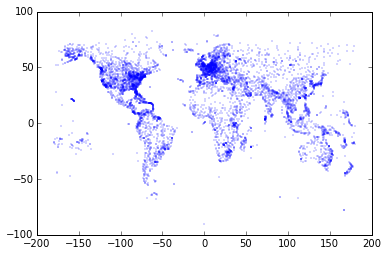

In [98]:
import matplotlib.pyplot as plt
plt.plot(users['variable1'], users['variable2'], ".", markersize=0.75)

We can update our DataFrame given the new information we discovered.

In [99]:
users.columns = ['user', 'longitude', 'latitude', 'sum']
users.head()

,user,longitude,latitude,sum
0,parallelconcerned,145.391881,-6.081689,139.310192
1,driftmvc,145.788700,-5.207083,140.581617
2,snowdonevasive,144.295861,-5.826789,138.469072
3,cobolglaucous,146.726242,-6.569828,140.156414
4,stylishmugs,147.220050,-9.443383,137.776667


#### Another example
Let's grab a slightly modified version of the survey data from your first homework assignment. It's located on the web, so let's save time by downloading it straight from the command line and placing it in the correct folder.

In [100]:
!curl -o data/ds_survey.csv www.moakler.org/ds/ds_survey.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10324  100 10324    0     0  66539      0 --:--:-- --:--:-- --:--:-- 67477


Now that we have the data, let's take a look at what we have.

In [101]:
!head -5 data/ds_survey.csv

timestamp,professional_experience,programming_languages,full_time,season,data_visualization,python,mathematics,statistics,machine_learning,business_strategy,communication,fruit,degree,terminal,why,regression,databases,cloud,api
9/22/2015 20:51:41,1,"C/C++, Matlab/Octave",No,Fall,7,1,10,8,2,8,9,Oranges,MSDS,1,"First, this is a required. : ) Second, I love to planning and I recognized that getting data and using them in the right way can help me plan events that gain more pleasures from the participants. I took intro. class back in my undergraduate in Syracuse University and it was one of  my favorite classes I've took, cuz instead of reciting stuff, I really learned how to complete some real life task and have fun with the knowledge I just earned. I hope this intro class will give me a good idea on what is going on in the ""datalized"" world. ",No,No,No,No
9/22/2015 22:11:41,1,"Python, C/C++, Matlab/Octave",No,Summer,7,5,7,7,1,7,6,Apples,MS systems engineering,4,Lear more about programm

It looks like a fairly well structured .csv file. Let's use pandas to turn it into a data frame.

In [102]:
survey = pd.read_csv("data/ds_survey.csv")

We have a lot of data here. How can we start to make sense of it? Using the pandas `describe()` method, we can get a summary of the numeric features.

In [103]:
survey.describe()

,data_visualization,python,mathematics,statistics,machine_learning,business_strategy,communication,terminal
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,4.931034,5.137931,7.172414,6.000000,3.482759,4.172414,6.034483,4.448276
std,2.631282,2.601155,2.071386,2.251983,2.473007,2.803938,2.078508,2.680434
min,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,6.000000,5.000000,1.000000,1.000000,5.000000,2.000000
50%,5.000000,5.000000,7.000000,6.000000,3.000000,3.000000,6.000000,4.000000
75%,7.000000,7.000000,9.000000,8.000000,5.000000,7.000000,8.000000,7.000000
max,8.000000,9.000000,10.000000,10.000000,8.000000,9.000000,9.000000,9.000000


You might find it easier to flip the data frame,

In [104]:
survey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
data_visualization,29,4.931034,2.631282,1,3,5,7,8
python,29,5.137931,2.601155,1,3,5,7,9
mathematics,29,7.172414,2.071386,3,6,7,9,10
statistics,29,6.000000,2.251983,2,5,6,8,10
machine_learning,29,3.482759,2.473007,1,1,3,5,8
business_strategy,29,4.172414,2.803938,1,1,3,7,9
communication,29,6.034483,2.078508,1,5,6,8,9
terminal,29,4.448276,2.680434,1,2,4,7,9


Do we have other features? Some that aren't numeric? Let's take a look.

In [105]:
survey.columns

Index([u'timestamp', u'professional_experience', u'programming_languages', u'full_time', u'season', u'data_visualization', u'python', u'mathematics', u'statistics', u'machine_learning', u'business_strategy', u'communication', u'fruit', u'degree', u'terminal', u'why', u'regression', u'databases', u'cloud', u'api'], dtype='object')

It looks like we have quite a few. But what type are they if they're not numeric? Let's take a look,

In [106]:
survey.head()

,timestamp,professional_experience,programming_languages,full_time,season,data_visualization,python,mathematics,statistics,machine_learning,business_strategy,communication,fruit,degree,terminal,why,regression,databases,cloud,api
0,9/22/2015 20:51:41,1,"C/C++, Matlab/Octave",No,Fall,7,1,10,8,2,8,9,Oranges,MSDS,1,"First, this is a required. : ) Second, I love ...",No,No,No,No
1,9/22/2015 22:11:41,1,"Python, C/C++, Matlab/Octave",No,Summer,7,5,7,7,1,7,6,Apples,MS systems engineering,4,Lear more about programming language practices...,Yes,Yes,No,No
2,9/23/2015 1:11:15,5,"Python, Java, JavaScript",No,Fall,7,7,8,7,4,7,8,Apples,MSIS,8,I hope to understand the process of analyzing ...,No,Yes,Yes,Yes
3,9/23/2015 1:49:38,5,"Java, C/C++, JavaScript, Matlab/Octave",No,Summer,8,2,7,5,1,1,8,Apples,MS in Scientific Computing,6,I've always been interested in how information...,Yes,No,No,No
4,9/23/2015 10:11:22,6,"Python, Java, JavaScript",Yes,Fall,1,7,7,4,3,1,7,Oranges,MSDS,7,Get some understanding of the concepts of Data...,Yes,Yes,Yes,Yes


A few fields are Yes/No. Let's turn these into 0's and 1's.

In [107]:
for field in ['full_time', 'regression', 'databases', 'cloud', 'api']:
    survey[field] = (survey[field] == "Yes").astype('int')

In [108]:
survey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
full_time,29,0.344828,0.483725,0,0,0,1,1
data_visualization,29,4.931034,2.631282,1,3,5,7,8
python,29,5.137931,2.601155,1,3,5,7,9
mathematics,29,7.172414,2.071386,3,6,7,9,10
statistics,29,6.000000,2.251983,2,5,6,8,10
machine_learning,29,3.482759,2.473007,1,1,3,5,8
business_strategy,29,4.172414,2.803938,1,1,3,7,9
communication,29,6.034483,2.078508,1,5,6,8,9
terminal,29,4.448276,2.680434,1,2,4,7,9
regression,29,0.724138,0.454859,0,0,1,1,1


We can plot some of the features if we want,

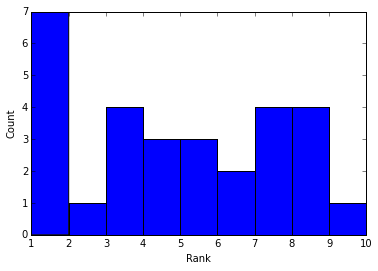

In [143]:
import matplotlib.pyplot as plt

plt.hist(survey['terminal'], bins=range(1, 11))
plt.ylabel('Count')
plt.xlabel('Rank')
plt.xticks(ha='center')
plt.show()

We can also take a look at subsets of the data,

In [125]:
survey.loc[survey['cloud'] == 1]

,timestamp,professional_experience,programming_languages,full_time,season,data_visualization,python,mathematics,statistics,machine_learning,business_strategy,communication,fruit,degree,terminal,why,regression,databases,cloud,api
2,9/23/2015 1:11:15,5,"Python, Java, JavaScript",0,Fall,7,7,8,7,4,7,8,Apples,MSIS,8,I hope to understand the process of analyzing ...,0,1,1,1
4,9/23/2015 10:11:22,6,"Python, Java, JavaScript",1,Fall,1,7,7,4,3,1,7,Oranges,MSDS,7,Get some understanding of the concepts of Data...,1,1,1,1
10,9/24/2015 12:54:19,2,"Python, Matlab/Octave, SAS/SPSS, Stata",0,Fall,1,7,9,6,4,3,3,Apples,MSDS,3,I am interested in getting a more business-ori...,1,0,1,1
12,9/24/2015 17:40:51,1,"Python, C/C++, R, Matlab/Octave",0,Fall,3,5,3,3,5,3,3,Oranges,MSDS,5,I want to improve my communicating and present...,0,0,1,1
18,9/25/2015 22:35:30,3,"Python, C/C++, Matlab/Octave, SAS/SPSS",0,Summer,3,5,9,7,5,3,4,Apples,MSDS,6,Because I want to learning something about the...,1,0,1,0


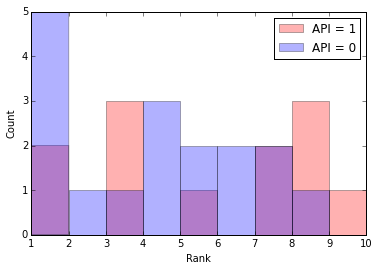

In [149]:
import matplotlib.pyplot as plt

plt.hist(list(survey.loc[survey['api'] == 1, 'terminal']), color="red", alpha=0.3, bins=range(1, 11), label="API = 1")
plt.hist(list(survey.loc[survey['api'] == 0, 'terminal']), color="blue", alpha=0.3, bins=range(1, 11), label="API = 0")
plt.ylabel('Count')
plt.xlabel('Rank')
plt.legend()